# Numerical root finding

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Bisection method
In this section we look at root finding using the bisection method. First we define a quadratic to test our algorithm on and plot it.

In [26]:
def f(x):
    return (x-2)*(x+3)

In [27]:
x = np.arange(-4,4,0.1)
vf = np.vectorize(f)
y = vf(x)

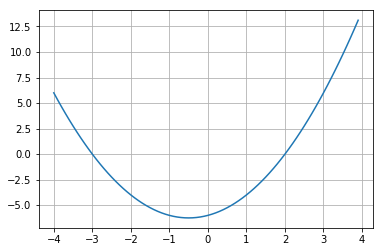

In [28]:
plt.grid(True)
plt.plot(x,y)

Next we define a simple bisection algorithm. Note that the below implementation does not check if a root is bracketed and only works when $f(a) < 0 < f(b)$

In [29]:
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [32]:
root = FindRootBisection(f, 1, 4, 1e-12)
print("Bisection found at root at x = ", root)

Bisection found at root at x =  1.9999999999997726


A good check on your code is to substitute the value it found back into the equation and check it is root

In [9]:
f(root)

-1.1368683772161086e-12

As we discussed in the lecture the method converges linearly, which is pretty slow. We can set the final *optional* argument to the FindRootBisection() function to True to print the midpoint of each step.

In [35]:
root = FindRootBisection(f, 1, 4, 1e-12, True)

2.5
1.75
2.125
1.9375
2.03125
1.984375
2.0078125
1.99609375
2.001953125
1.9990234375
2.00048828125
1.999755859375
2.0001220703125
1.99993896484375
2.000030517578125
1.9999847412109375
2.0000076293945312
1.9999961853027344
2.000001907348633
1.9999990463256836
2.000000476837158
1.999999761581421
2.0000001192092896
1.9999999403953552
2.0000000298023224
1.9999999850988388
2.0000000074505806
1.9999999962747097
2.000000001862645
1.9999999990686774
2.0000000004656613
1.9999999997671694
2.0000000001164153
1.9999999999417923
2.000000000029104
1.999999999985448
2.000000000007276
1.999999999996362
2.000000000001819
1.9999999999990905
2.0000000000004547
1.9999999999997726


### Bisection method - issues
If the function is continous and your bracket a root the function is guaranteed to find **a root**. If there is more than one root in the initial bracket it is not always clear which one it will converge to. We'll define a new function to investigate this. We'll use $f(x) = \sin(x)$ which has infinitely many roots.

In [36]:
def f(x):
    return np.sin(x)

Let's plot the function

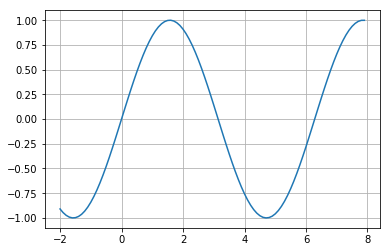

In [37]:
x = np.arange(-2,8,0.1)
vf = np.vectorize(f)
y = vf(x)

plt.grid(True)
plt.plot(x,y)

Recalling that our bisection function needs $f(a) < 0 < f(b)$ we can bracket three roots with $a=-1$ and $b=7.2$

In [38]:
FindRootBisection(f, -1 , 7.2, 1e-6)

2.384185793181914e-08

We can see, with this choice of initial bracket, the method finds the root at $x=0$. If we slightly change the bracket so that $b=7.3$ we find a different result:

In [39]:
FindRootBisection(f, -1 , 7.3, 1e-6)

6.283186161518097

We now see that the method has found the root at $x=2\pi$. 

If the function is not continuous, the method will can give incorrect results. Let's look at $f(x) = -\tan(x)$ which has an asymptote at $x=\pi$.

In [17]:
def g(x):
    return -np.tan(x)

In [20]:
x = np.arange(1.2,2,0.005)
vg = np.vectorize(g)
y = vg(x)

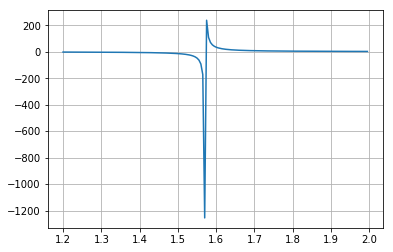

In [21]:
plt.grid(True)
plt.plot(x,y)

Note the plot shows a connection over the asymptote. This an artifact of sampling the function at a range of points and connecting the values. If we now root find on this function the code tells us there is a root at $x=\pi$. It is important to understand the function you are root finding on, and plotting it is a good way to get feel for it.

In [40]:
FindRootBisection(g, 1.4, 1.8, 1e-9)

1.5707963265478613

# Newton-Raphson method
The bisection method is robust but converges very slowly. In the lectures we introduced a much more rapidly convergent method: the Newton-Raphson method. This method requires the function to be **differentiable**, and the function and its derivative need to be specified.

In [41]:
def f(x):
    return (x-2)*(x+3)

def df(x):
    return 2*x + 1

In [44]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        if(printSteps):
            print(x0)
    return x0

In [48]:
rootNR = FindRootNewtonRaphson(f, df, 4, 1e-16)
print(rootNR)

2.0


If we set the final optional argument to True, the method will print out the steps it takes. We can see that it converges much more rapidly than the bisection method. In the lectures we showede that the convergence is quadratic.

In [51]:
FindRootNewtonRaphson(f, df, 4, 1e-16, True)

2.4444444444444446
2.0335429769392035
2.000222047013251
2.0000000098600994
2.0
2.0


2.0

The Newton-Raphson method converges much faster than the bisection method but, as we discussed in the lectures, it is not guaranteed to converge. See the notebook Newton-Raphson-visualize.ipynb for a visualization of the method and examples of when it fails.